# Lab 5 - Location Based Analysis

This will talk students throug importing and analyzing location data as discussind in Session 8 - Location Based Analsysis.

## Installing geopandas
In previous labs we have used pandas to organize our data in dataframes.  When the data contains locations, geopandas makes it eaasy to define points and geometries, set the correct coordinate reference system, perform spatial merges and filters, and visualize the data.  It is not installed by default, so we will use pip to install it.  This can also be done from the linux terminal.  Terminal commands can be run in Jupyter notebooks by starting with an exclamation point.

In [2]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable


## Installing other dependencies
Some additional python modules that will make our lives easier are:

    openpyxl - imports excel files
    folium - works with geopandas to make maps interactive
    rtree - enables spatial merging of data

In [3]:
!pip3 install openpyxl
!pip3 install folium
!pip install rtree

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Import modules
We will use matplotlib, numpy, geopandas, and pandas.  The folium and openpyxl don't need to be imported directly as they are used by pandas and geopandas.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gp
import pandas as pd

## Import data
We are importing ACLED data from the USA in 2020 and 2021 from https://acleddata.com/data-export-tool/

We are using pandas to import the data because it is in excel format.  We could have opened the xlsx file in excel and saved it as .csv to import directly into geopandas using gp.read_file, but this is another tool in the toolkit.

In [6]:
acled_df=pd.read_excel('data/USA_2020_2021_Dec10.xlsx')

## Initial data exploration
Use "head" and "columns" to view the contents of the imported dataframe.  "Head" shows what the data looks like in many of the columns, but it also skips some of the columns.  "Columns" show a list of ALL of the column titles.

In [7]:
print(acled_df.head)
print(acled_df.columns)

<bound method NDFrame.head of        ISO EVENT_ID_CNTY  EVENT_ID_NO_CNTY EVENT_DATE  YEAR  TIME_PRECISION  \
0      840      USA23310             23310 2020-01-01  2020               1   
1      840      USA23416             23416 2020-01-01  2020               1   
2      840      USA23636             23636 2020-01-01  2020               1   
3      840      USA23414             23414 2020-01-01  2020               1   
4      840      USA23635             23635 2020-01-01  2020               1   
...    ...           ...               ...        ...   ...             ...   
36843  840      USA37401             37401 2021-12-10  2021               1   
36844  840      USA37386             37386 2021-12-10  2021               1   
36845  840      USA37449             37449 2021-12-10  2021               1   
36846  840      USA37460             37460 2021-12-10  2021               1   
36847  840      USA37378             37378 2021-12-10  2021               1   

                   EV

## Create geopandas dataframe
We don't need all of the data, so we will grab some columns of interest from the pandas dataframe and use geopandas to convert it to a geopandas dataframe.  Notice that we are building a geometry column in the geopandas dataframe from the LATITUDE and LONGITUDE columns in the original dataframe.


In [8]:
acled_gdf = gp.GeoDataFrame(acled_df[['ISO','EVENT_TYPE','ACTOR1','ACTOR2','ADMIN1','ADMIN2','FATALITIES']], crs='epsg:4326', geometry=gp.points_from_xy(acled_df.LONGITUDE, acled_df.LATITUDE))

In [9]:
acled_gdf.head

<bound method NDFrame.head of        ISO              EVENT_TYPE                      ACTOR1 ACTOR2  \
0      840                Protests  Protesters (United States)    NaN   
1      840                Protests  Protesters (United States)    NaN   
2      840                Protests  Protesters (United States)    NaN   
3      840                Protests  Protesters (United States)    NaN   
4      840                Protests  Protesters (United States)    NaN   
...    ...                     ...                         ...    ...   
36843  840                Protests  Protesters (United States)    NaN   
36844  840                Protests  Protesters (United States)    NaN   
36845  840  Strategic developments        American Contingency    NaN   
36846  840                Protests  Protesters (United States)    NaN   
36847  840                Protests  Protesters (United States)    NaN   

              ADMIN1         ADMIN2  FATALITIES                     geometry  
0             

## Explore the map
If you have installed geopandas and folium, it is incredibly easy to explore your dataset with a single command: <geopandas_dataframe>.explore()

This plots your data on a background map that you can pan and zoom. You can also mouse-over individual data points and it displays the information associated with that point from your dataframe.  Because it is interactive and contains ALL the data, it is slow to load and will make your Jupyter notebook file size very large.  If you are done exploring and want to speed up your notebook, clear the output for the cell.

In [ ]:
acled_gdf.explore()

By default, .explore() uses openstreetmaps for the basemap.  If you want a different map or you are on a network that doesn't have access to openstreetmaps, you can declare a custom map tile server like below.  Here we have changed the tiles to cartodb.  Notice that you have to also declare an attribution for custom tiles or python will refuse to render it.

In [ ]:
acled_gdf.explore(tiles='https://cartodb-basemaps-c.global.ssl.fastly.net/light_all/{z}/{x}/{y}.png',attr='cartodb')

## Import shapefile of US states
Shapefiles provide polygons that outline geographic areas.  These can be used to give spatial context to your data as well as run geographic processing such as count how many items are contained in a shape.

Because our data is in the US, we are using a shapefile downloaded from https://www.census.gov/geographies/mapping-files/time-series/geo/carto-boundary-file.html

In [25]:
states=gp.read_file('data/states/cb_2018_us_state_20m.shp')
states.head

<bound method NDFrame.head of    STATEFP   STATENS     AFFGEOID GEOID STUSPS                  NAME LSAD  \
0       24  01714934  0400000US24    24     MD              Maryland   00   
1       19  01779785  0400000US19    19     IA                  Iowa   00   
2       10  01779781  0400000US10    10     DE              Delaware   00   
3       39  01085497  0400000US39    39     OH                  Ohio   00   
4       42  01779798  0400000US42    42     PA          Pennsylvania   00   
5       31  01779792  0400000US31    31     NE              Nebraska   00   
6       53  01779804  0400000US53    53     WA            Washington   00   
7       72  01779808  0400000US72    72     PR           Puerto Rico   00   
8       01  01779775  0400000US01    01     AL               Alabama   00   
9       05  00068085  0400000US05    05     AR              Arkansas   00   
10      35  00897535  0400000US35    35     NM            New Mexico   00   
11      48  01779801  0400000US48    48     TX

## Display points with polygons
Graph the locations from the ACLED datafraem on top of the US map.

We can set the colormap to color each point based on the number of fatalities at that location. 

From the legend we can see that there are 10 fatalities somewhere, but we can't tell where.  Also, the map is spread out really far because of Alaska and Hawaii.  

<AxesSubplot:>

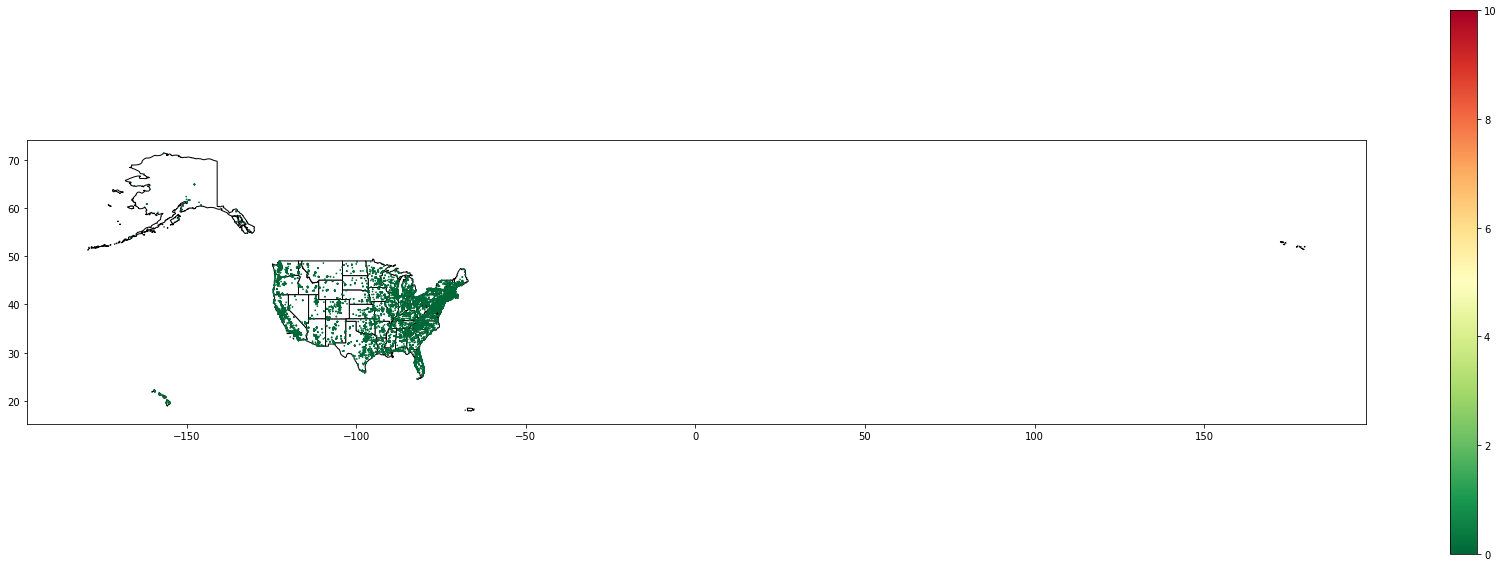

In [69]:
base = states.plot(color='white',edgecolor='black', figsize=(30,10))
acled_gdf.plot(ax=base,column='FATALITIES',marker='o',cmap='RdYlGn_r',markersize=0.5,legend=True)

First, we'll make the marker size related to the number of event fatalities so that we can see roughly where the worst events were.

<AxesSubplot:>

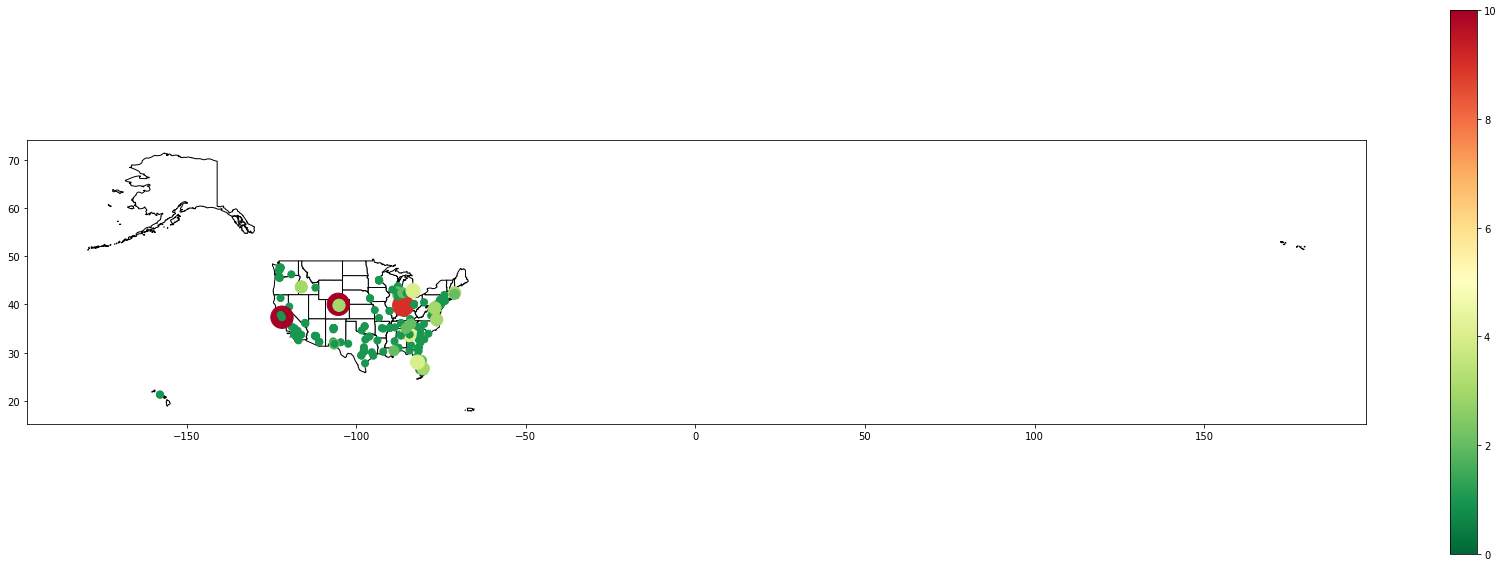

In [70]:
base = states.plot(color='white',edgecolor='black', figsize=(30,10))
acled_gdf.plot(ax=base,column='FATALITIES',marker='o',cmap='RdYlGn_r',markersize=50*acled_gdf['FATALITIES'],legend=True)

## Merge data
Rather than just looking at points on a map, lets view a summary of the data per state.  In order to do this, we are going to join our two geopandas dataframes based on the state names.  In order to do that we need to rename the column that contains the state name to the same thing in both dataframes.  

In [28]:
acled_gdf.rename(columns={'ADMIN1':'STATE_NAME'},inplace=True)
states.rename(columns={'NAME':'STATE_NAME'},inplace=True)
merged_gdf = pd.merge(states,acled_gdf[['FATALITIES','STATE_NAME']],on='STATE_NAME', how='left')
merged_gdf.head

<bound method NDFrame.head of       STATEFP   STATENS     AFFGEOID GEOID STUSPS    STATE_NAME LSAD  \
0          24  01714934  0400000US24    24     MD      Maryland   00   
1          24  01714934  0400000US24    24     MD      Maryland   00   
2          24  01714934  0400000US24    24     MD      Maryland   00   
3          24  01714934  0400000US24    24     MD      Maryland   00   
4          24  01714934  0400000US24    24     MD      Maryland   00   
...       ...       ...          ...   ...    ...           ...  ...   
36844      44  01219835  0400000US44    44     RI  Rhode Island   00   
36845      44  01219835  0400000US44    44     RI  Rhode Island   00   
36846      44  01219835  0400000US44    44     RI  Rhode Island   00   
36847      44  01219835  0400000US44    44     RI  Rhode Island   00   
36848      44  01219835  0400000US44    44     RI  Rhode Island   00   

             ALAND      AWATER  \
0      25151100280  6979966958   
1      25151100280  6979966958   
2  

## Aggregate the data
After the dataframes are merged, there are multiple rows for each state.  We want to calculate the total fatalities per state, so we will use the geopandas "disolve" to group by the state name and sum the fatalities. 

In [29]:
merged_sum_gdf = merged_gdf.dissolve(by='STATE_NAME', aggfunc={'FATALITIES':'sum'})
merged_sum_gdf.head

<bound method NDFrame.head of                                                                geometry  \
STATE_NAME                                                                
Alabama               POLYGON ((-88.46866 31.89386, -88.46866 31.933...   
Alaska                MULTIPOLYGON (((-179.17426 51.27906, -178.9955...   
Arizona               POLYGON ((-114.79968 32.59362, -114.80939 32.6...   
Arkansas              POLYGON ((-94.61792 36.49941, -94.36120 36.499...   
California            MULTIPOLYGON (((-118.59403 33.03595, -118.5400...   
Colorado              POLYGON ((-109.05996 38.49999, -109.05151 39.1...   
Connecticut           POLYGON ((-73.69594 41.11526, -73.48271 41.212...   
Delaware              POLYGON ((-75.77379 39.72220, -75.75323 39.757...   
District of Columbia  POLYGON ((-77.11976 38.93434, -77.04102 38.995...   
Florida               MULTIPOLYGON (((-82.01491 24.54307, -81.98391 ...   
Georgia               POLYGON ((-85.60516 34.98468, -85.47434 34.983..

<AxesSubplot:>

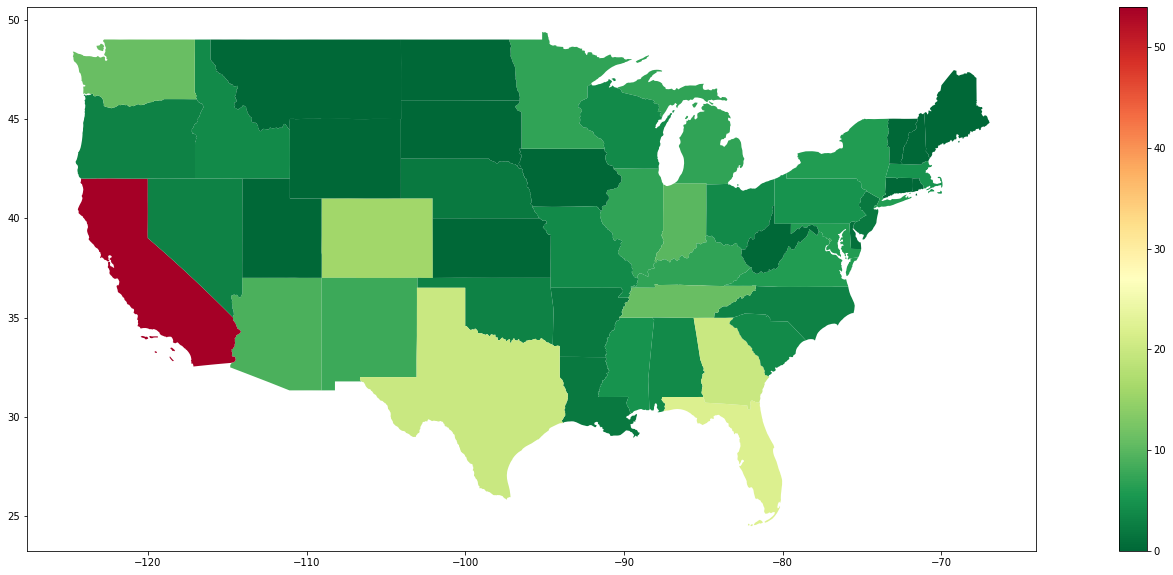

In [71]:
fig, ax = plt.subplots(1,figsize=(30,10)) #create a figure
merged_sum_gdf = merged_sum_gdf.loc[~merged_sum_gdf.index.isin(['Alaska','Hawaii','Puerto Rico'])] # get rid of Alaska, Hawaii, and Puerto Rico to focus on CONUS
merged_sum_gdf.plot(column='FATALITIES', cmap='RdYlGn_r', ax=ax, legend=True)  # plot the map

## Merge by location
If we didn't have state names, we could have done a spatial join to merge the data by location.  This usually takes longer to process, but is often necessary if your data locations aren't already labeled with states or countries.  

<AxesSubplot:>

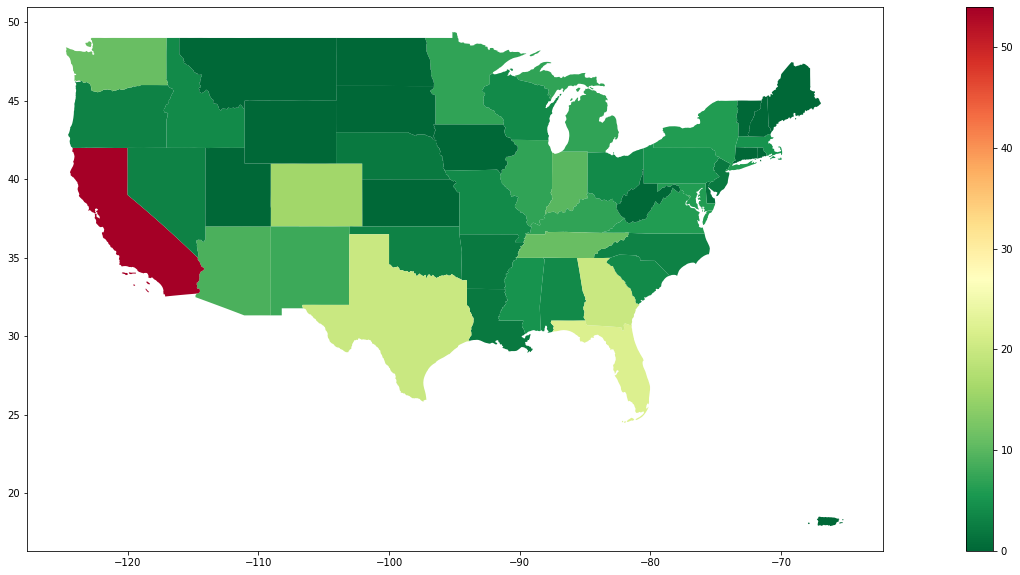

In [62]:
states_conus = states[(states.STATE_NAME != 'Alaska') & (states.STATE_NAME != 'Hawaii') & (states.STATE_NAME != 'Puerto Rico')]
spatial_merge_gdf = gp.tools.sjoin(states_conus.to_crs('epsg:4326'),acled_gdf[['geometry','FATALITIES']],how='left')
spatial_merged_sum_gdf = spatial_merge_gdf.dissolve(by='STATE_NAME', aggfunc={'FATALITIES':'sum'})
fig, ax = plt.subplots(1,figsize=(30,10))
spatial_merged_sum_gdf.plot(column='FATALITIES', cmap='RdYlGn_r', ax=ax, legend=True)

In [ ]:
## Map Alternatives
We've been using the geopandas built-in map plotting functions, but if you want interactive maps, you can use folium or bokeh.  We saw earlier that geopandas makes it very easy to make an interactive map with folium using .explore().  

In [72]:
spatial_merged_sum_gdf.explore(column='FATALITIES',cmap='RdYlGn_r')